# Breast Cancer Notebook

This notebook contains a very basic KNN model trained and tested on a breast cancer dataset to predict a malignant/beign tumor.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [25]:
breast_cancer_data = load_breast_cancer()
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [26]:
breast_cancer_data.target_names # 0 for malignant and 1 for benign

array(['malignant', 'benign'], dtype='<U9')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 100)

classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
print(classifier.score(X_test, y_test))

0.9473684210526315


In [29]:
score = 0
k_score = 0
accuracies = []
k_list = range(1, 101)
for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    accuracies.append(classifier.score(X_test, y_test))
    if classifier.score(X_test, y_test) > score:
        score = classifier.score(X_test, y_test)
        k_score = k

print(k_score, score)

23 0.9649122807017544


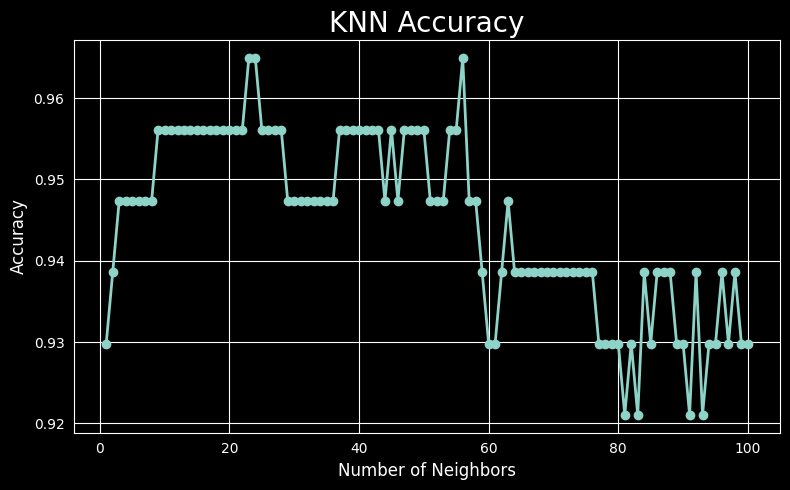

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(k_list, accuracies, marker='o', linewidth=2)
plt.xlabel('Number of Neighbors', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN Accuracy', fontsize=20)
plt.tight_layout()
plt.show()